In [2]:
import os
os.chdir('..')

In [3]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import pandas as pd

from preprocessing.interface import encode_df_text
from preprocessing.embedding import one_hot

from model_utils.learning_curve import plot_learning_curve

In [4]:
df_text = pd.read_csv('prepared/lemmatized.csv')
y = pd.read_csv('prepared/target.csv')

X, y = encode_df_text(df_text, y, 3, 3,  one_hot)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .6)

In [6]:
model = MLPClassifier(hidden_layer_sizes = (10, 5),
                        batch_size = 64,
                        verbose = True,
                        max_iter = 3, 
                        alpha = 1e-1)

In [7]:
model.fit(X_train, y_train)

Iteration 1, loss = 0.79811052
Iteration 2, loss = 0.71700076
Iteration 3, loss = 0.60268562


C:\ProgramData\Anaconda\envs\kaggle-disaster-tweets\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.1, batch_size=64, hidden_layer_sizes=(10, 5), max_iter=3,
              verbose=True)

In [8]:
print(classification_report((model.predict_proba(X_train)[:, 1] > .5).astype(float), y_train))
print(classification_report((model.predict_proba(X_test)[:, 1] > .5).astype(float), y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88      2527
         1.0       0.79      0.89      0.84      1683

    accuracy                           0.86      4210
   macro avg       0.86      0.87      0.86      4210
weighted avg       0.87      0.86      0.87      4210

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81      1628
         1.0       0.73      0.77      0.75      1179

    accuracy                           0.78      2807
   macro avg       0.78      0.78      0.78      2807
weighted avg       0.78      0.78      0.78      2807



In [ ]:
p = plot_learning_curve(MLPClassifier(hidden_layer_sizes = (10, 5),
                        batch_size = 64,
                        verbose = False,
                        max_iter = 2, 
                        alpha = 1e-1), X_train, y_train)

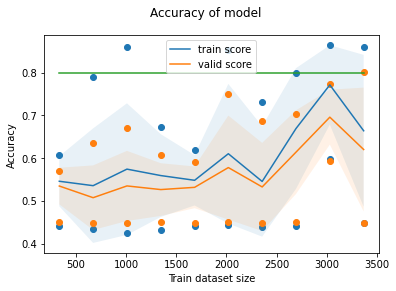

In [10]:
p

Lines are mean accuracies, shaded areas are mean +/- standard deviation, dots are min/max values